In [1]:
%matplotlib widget

import os
import sys
import matplotlib.pyplot as plt
from IPython import embed
import pickle

sys.path.append(os.path.abspath("/develop/code/evaluation"))
import evaluation_3 as eval

path_results = "/develop/results/spie_journal_2023"
colors = ['darkgreen','purple','#4e88d9'] 

Using MPI version 4.0, 1 processes


Global seed set to 1337


In [27]:
exp_name = "baseline" # 0. phase | 1. curv | 2. recon/thermo | 3. phase/thermo 
        
def get_results(exp_name,stage,resim=False,resim_index=None,folder_name=None):

    if folder_name is None:
        folder_name = exp_name + "_" + str(stage)
    
    print(folder_name)

    loss_file = os.path.join(path_results, folder_name, "loss.csv")
    loss = eval.load_loss(loss_file)
            # if type(loss) == bool and loss == False:
            #     print("Failed to load loss")
            #     pass
            # else:
            #     key_dict['loss'] = loss
            #     return key_dict
    encoder_train = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "encoder.pkl"), "rb"))
    recon_train = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "recon.pkl"), "rb"))
    
    encoder_valid =pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "encoder.pkl"), "rb"))
    recon_valid = pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "recon.pkl"), "rb"))
    
    # outputs from the model
    resim_train_eval = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "resim.pkl"), "rb"))
    resim_valid_eval = pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "resim.pkl"), "rb"))
    if resim == True:

        try:
            resim_train_results = pickle.load(open(os.path.join(path_results, folder_name, "train_info", f"sample_{resim_index}_preprocessed.pkl"), "rb"))
            #resim_train_results = resim_train_results['near_fields_1550']['ey']
        except FileNotFoundError:
            resim_train_results = None
            print("no file for resim_train")
        try:
            resim_valid_results = pickle.load(open(os.path.join(path_results, folder_name, "valid_info", f"sample_{resim_index}_preprocessed.pkl"), "rb"))
            #resim_valid_results = resim_valid_results['near_fields_1550']['ey']
        except:
            resim_valid_results = None
            print("no file for resim_valid")
        return loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval, resim_train_results, resim_valid_results
        
    elif resim == False:
        return loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval

loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval = get_results(exp_name, stage=0)
#eval.plot_loss(loss, loss, loss, loss, "stage 0 - phase")

baseline_0


In [3]:
# loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval = get_results(exp_name, stage=1)
# plt.close("all")
# eval.plot_loss(loss, loss, loss, loss, "stage 1 - der")

In [4]:
# loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval = get_results(exp_name, stage=1, folder_name = "baseline_1_nockpt")
# plt.close("all")
# eval.plot_loss(loss, loss, loss, loss, "stage 1 - der - no checkpoint")

In [5]:
# loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval = get_results(exp_name, stage=2)
# plt.close("all")
# eval.plot_loss(loss, loss, loss, loss, "stage 2 - recon + thermo")

baseline_3


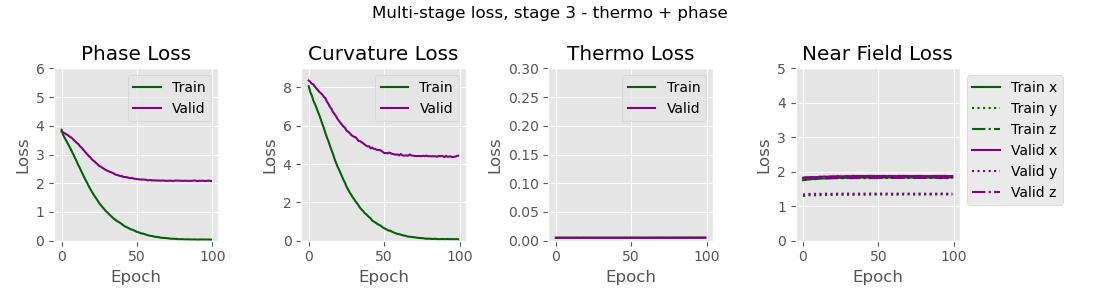

In [28]:
loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval, resim_train_results, resim_valid_results = get_results(exp_name, stage=3, resim=True, resim_index=1)
plt.close("all")
eval.plot_loss(loss, loss, loss, loss, "stage 3 - thermo + phase")

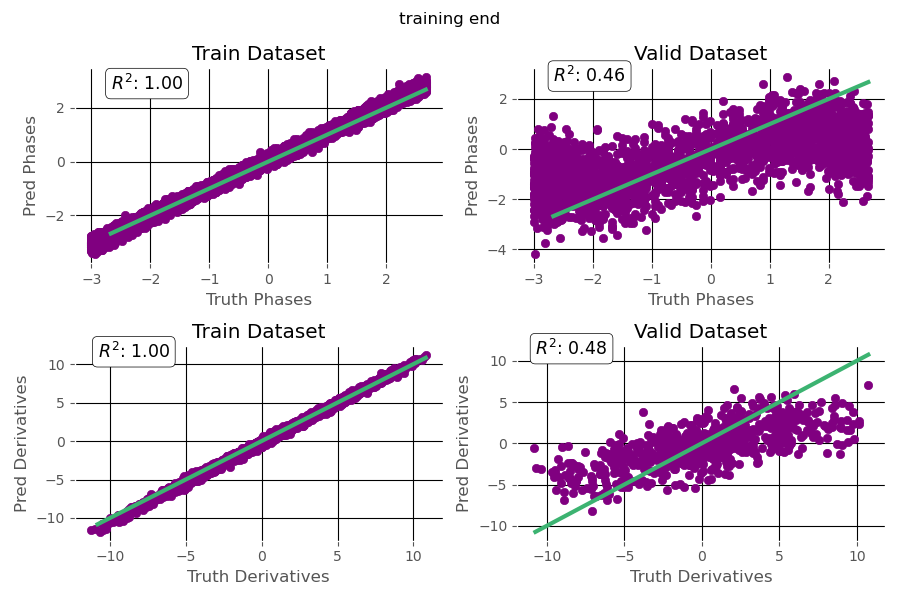

In [7]:
phase_train_truth, phase_train_pred = encoder_train['phase_truth'].flatten(), encoder_train['phase_pred'].flatten()
phase_valid_truth, phase_valid_pred = encoder_valid['phase_truth'].flatten(), encoder_valid['phase_pred'].flatten()
der_train_truth, der_train_pred = encoder_train['deriv_truth'].flatten(), encoder_train['deriv_pred'].flatten()
der_valid_truth, der_valid_pred = encoder_valid['deriv_truth'].flatten(), encoder_valid['deriv_pred'].flatten()
int_train_truth, int_train_pred = encoder_train['intensity_truth'].flatten(), encoder_train['intensity_pred'].flatten()

plt.close("all")
title = "training end"
eval.regression_plots(title, phase_train_truth, phase_train_pred, phase_valid_truth, phase_valid_pred, der_train_truth, der_train_pred, der_valid_truth, der_valid_pred, save_fig=False)

In [22]:
#encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval
print(resim_train_eval.keys())
print(resim_train_results.keys())

dict_keys(['phase_pred', 'phase_truth', 'intensity_pred', 'intensity_truth', 'nf_2881_pred', 'nf_2881_truth', 'nf_1650_pred', 'nf_1650_truth', 'nf_1550_pred', 'nf_1550_truth', 'nf_1300_pred', 'nf_1300_truth', 'nf_1060_pred', 'nf_1060_truth'])
dict_keys(['all_near_fields', 'radii', 'phases', 'derivatives'])


In [26]:
# this is the resimulated field
resim_train_results['all_near_fields']['near_fields_1550'].shape # batch, component, mag/angle, x, y

torch.Size([1, 3, 2, 166, 166])

In [58]:
resim_train_eval['nf_1550_truth'].shape

(16, 2, 166, 166)

In [70]:
_, _, _, _, _, resim_train_eval, resim_valid_eval, _, _ = get_results(exp_name, stage=2, resim=True, resim_index=1)
print(resim_train_eval['nf_1550_pred'].shape) #recon, shape = batch_size, x/y/z, mag/angle, x, y
print(resim_train_eval['nf_1550_truth'].shape) #truth, shape = batch_size, mag/angle, x, y
resim_train_eval.keys()

baseline_2
no file for resim_train
no file for resim_valid
(16, 3, 2, 166, 166)
(16, 2, 166, 166)


dict_keys(['phase_pred', 'phase_truth', 'intensity_pred', 'intensity_truth', 'nf_2881_pred', 'nf_2881_truth', 'nf_1650_pred', 'nf_1650_truth', 'nf_1550_pred', 'nf_1550_truth', 'nf_1300_pred', 'nf_1300_truth', 'nf_1060_pred', 'nf_1060_truth'])

In [72]:
import numpy as np
import torch
def plot_dft_fields(truth, recon, resim, target, idx=0, savefig=False):
    cmap = 'turbo'
    fig, ax = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(5,8), gridspec_kw={'width_ratios': [0.03, 1, 1]})
    fig.suptitle("Electric Fields, y component")

    mag_truth = truth[idx][0]
    angle_truth = truth[idx][1]
    mag_recon = recon[idx][1][0]
    angle_recon = recon[idx][1][1]
    mag_resim = resim[idx][1][0]
    angle_resim = resim[idx][1][1]

    ax[0][1].imshow(mag_truth**2, cmap = cmap, vmin = 0)    
    ax[0][2].imshow(angle_truth, cmap = cmap, vmin = -torch.pi, vmax = torch.pi)
    
    ax[1][1].imshow(mag_recon**2, cmap = cmap, vmin = 0)
    ax[1][2].imshow(angle_recon, cmap = cmap, vmin = -torch.pi, vmax = torch.pi)
    
    ax[2][1].imshow(mag_resim**2, cmap = cmap, vmin = 0)
    ax[2][2].imshow(angle_resim, cmap = cmap, vmin = -torch.pi, vmax = torch.pi)

    column_titles = ['Intensity', 'Phase']
    row_titles = ['Original/Truth', 'Recon', 'Resim']  # these row titles won't appear with axes off

    for j in range(2):
        ax[0][j+1].set_title(column_titles[j], fontsize=10)
    
    for i in range(3):
        ax[i][0].text(-0.5, 0.5, row_titles[i], transform = ax[i][0].transAxes, rotation=90, ha='center', va='center', fontsize=10)
        ax[i][0].axis("off")
        
    for i in range(3):
        for j in range(1, 3):
            ax[i][j].grid(False)
            ax[i][j].axis("off")
        
    fig.tight_layout()

Python 3.10.12 (main, Jul  5 2023, 18:54:27) [GCC 11.2.0]
Type 'copyright', 'credits' or 'license' for more information
IPython 8.14.0 -- An enhanced Interactive Python. Type '?' for help.



In [1]:  mag_truth.shape


Out[1]: (166, 166)



In [2]:  angle_truth.shape


Out[2]: (166, 166)



In [3]:  mag_recon.shape


Out[3]: (166, 166)



In [4]:  mag_angle.shape


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[4], line 1
----> 1 mag_angle.shape

NameError: name 'mag_angle' is not defined



In [5]:  angle_recon.shape


Out[5]: (166, 166)



In [6]:  exit


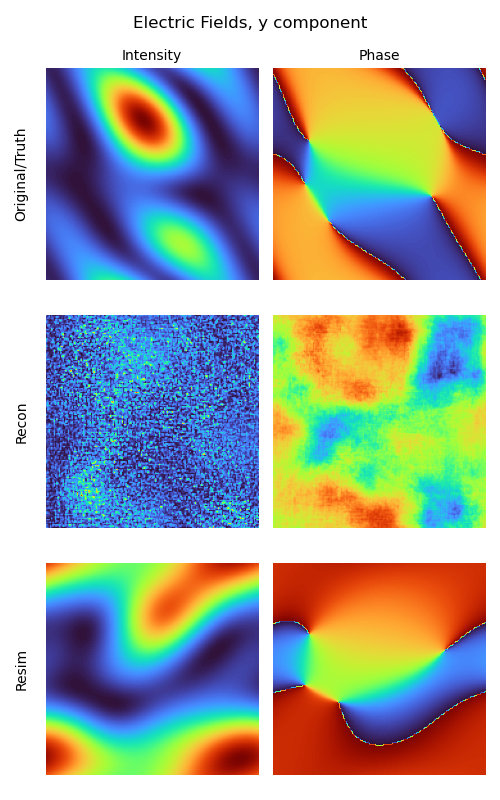

In [73]:
plot_dft_fields(resim_train_eval['nf_1550_truth'], resim_train_eval['nf_1550_pred'], resim_train_results['all_near_fields']['near_fields_1550'], target=None)

In [ ]:
plt.close("all")  
# plot dft fields: truth image, recon image, resim image
eval.plot_dft_fields(recon_train, recon_train, resim_train_results, 
           target = "temp title: Near Field, Train Dataset", batch=True, savefig = False)